In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# df = pd.read_csv("../degree 8 up to 11.csv")
df = pd.read_csv("../degree 10 up to 5.csv")

In [49]:
df.columns

Index(['Unnamed: 0', 'polynomial', 'degree', 'Mahler measure',
       'roots outside unit circle', 'number of real roots', 'trace poly',
       'Galois of poly', 'Galois of trace', 'discriminant', 'galois order',
       'trace galois order', 'galois ratio'],
      dtype='object')

In [50]:
df["discriminant"] = df["discriminant"].astype(np.double).abs()

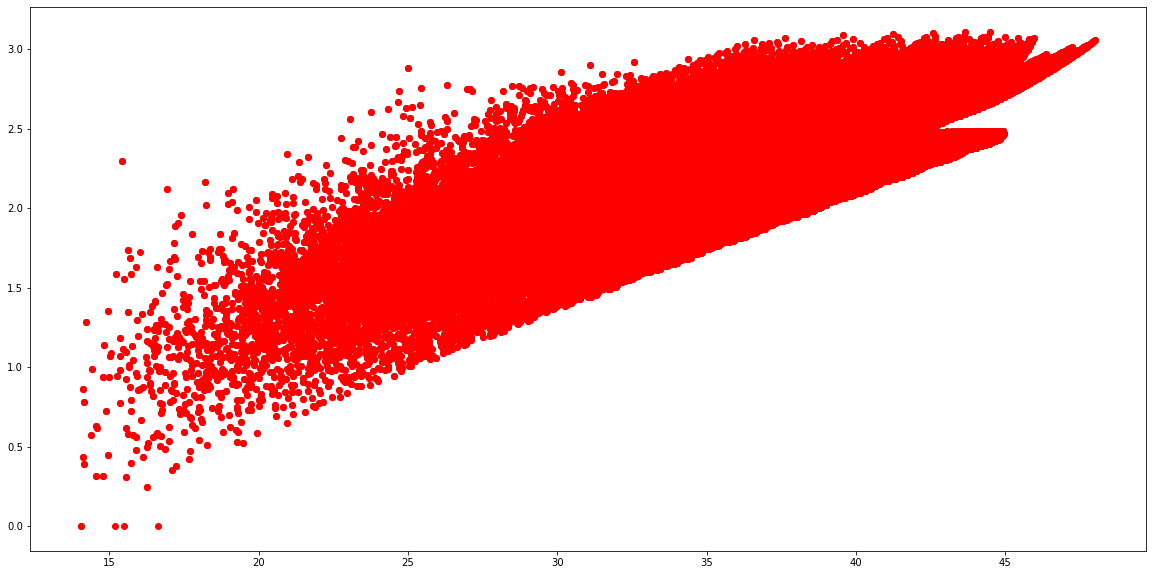

In [45]:
plt.figure(figsize=(20,10))
plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "red")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T4"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T4"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]=="5T3"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T3"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T2"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T2"]["Mahler measure"]), color = "lime")


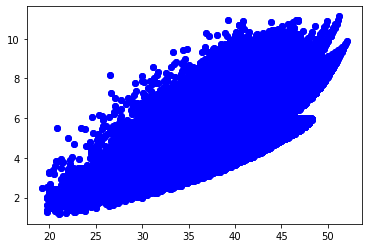

In [40]:
plt.scatter(np.log(df[df["Galois of trace"]=="5T5"]["discriminant"]),df[df["Galois of trace"]=="5T5"]["Mahler measure"], color = "blue")

In [46]:
df["Galois of poly"]

0         8T44
1         8T44
2         8T44
3         8T44
4         8T44
          ... 
251170    8T44
251171    8T44
251172    8T44
251173    8T44
251174    8T44
Name: Galois of poly, Length: 251175, dtype: object

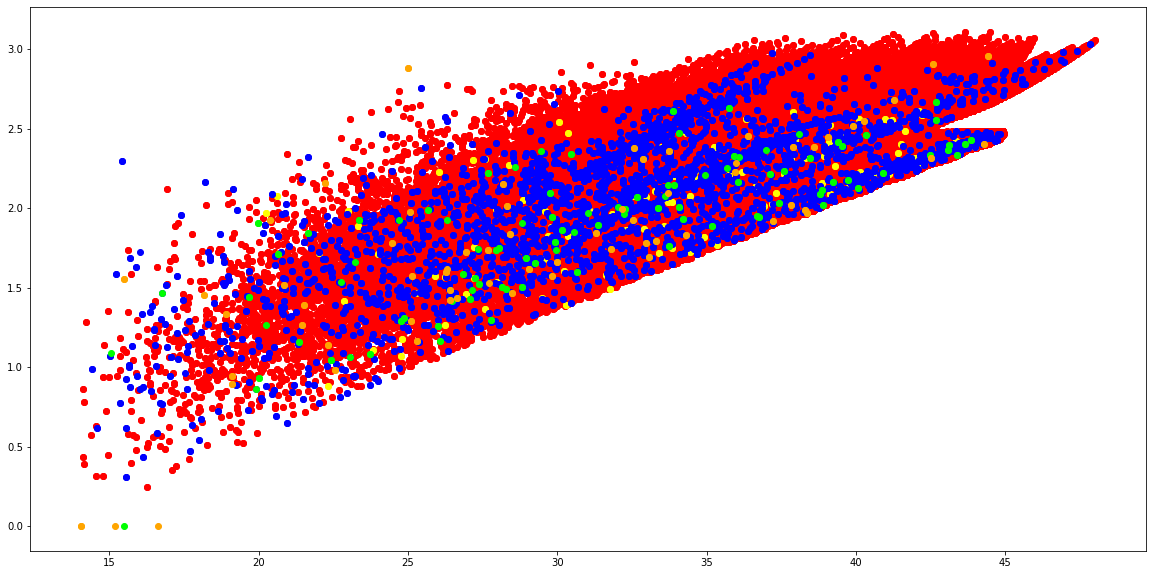

In [47]:
plt.figure(figsize=(20,10))
# plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "red")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="4T5"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T5"]["Mahler measure"]), color = "red")
plt.scatter(np.log(df[df["Galois of trace"]=="4T4"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T4"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]=="4T3"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T3"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="4T2"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T2"]["Mahler measure"]), color = "lime")
plt.scatter(np.log(df[df["Galois of trace"]=="4T1"]["discriminant"]),np.log(df[df["Galois of trace"]=="4T1"]["Mahler measure"]), color = "orange")


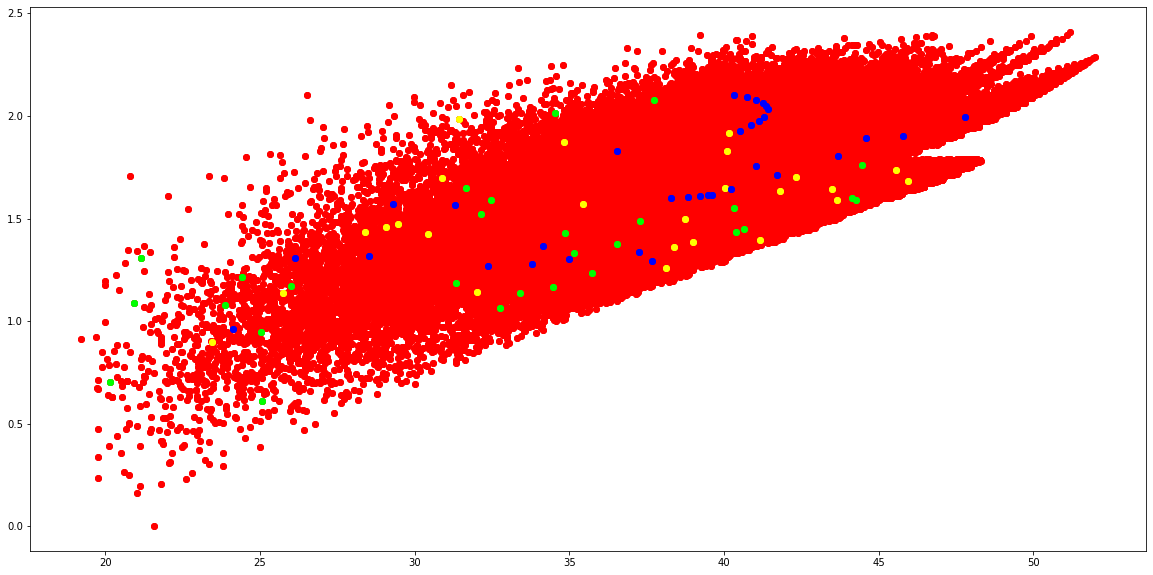

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(np.log(df["discriminant"]),np.log(df["Mahler measure"]), color = "red")
# plt.scatter(np.log(df[df["Galois of trace"]!="5T5"]["discriminant"]),df[df["Galois of trace"]!="5T5"]["Mahler measure"], color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T4"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T4"]["Mahler measure"]), color = "yellow")
plt.scatter(np.log(df[df["Galois of trace"]=="5T3"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T3"]["Mahler measure"]), color = "blue")
plt.scatter(np.log(df[df["Galois of trace"]=="5T2"]["discriminant"]),np.log(df[df["Galois of trace"]=="5T2"]["Mahler measure"]), color = "lime")
